In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found


In [8]:
# Save references to each table
class measure(Base):
    __tablename__ = 'measurement'
    
    
class stations(Base):
    __tablename__ = 'station'

In [9]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

# Exploratory Climate Analysis

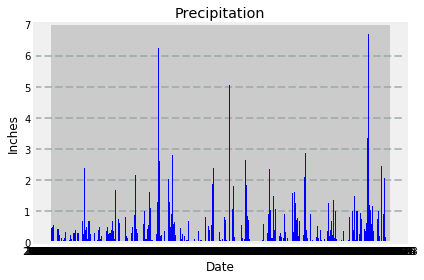

In [59]:
measurement_df = pd.read_sql("Select date,prcp from measurement where date >= '2016-08-23'", engine)
measurement_df

measurement_df.set_index("date")
data = measurement_df.sort_values(by='date',ascending=False)
data.head(5)

x = sorted_df["date"]
y = sorted_df["prcp"]
plt.bar(x,y, color='blue', align='center')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.title('Precipitation')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [64]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean = data["prcp"].mean()
max_ = data["prcp"].max()
min_= data["prcp"].min()
mode_ = data["prcp"].mode()
median_ = data["prcp"].median()

print(f'The mean is {mean}')
print(f'The max is {max_}')
print(f'The min is {min_}')
print(f'The mode is {mode_}')
print(f'The median is {median_}')

The mean is 0.17727857496288904
The max is 6.7
The min is 0.0
The mode is 0    0.0
dtype: float64
The median is 0.02


In [66]:
quartiles = data["prcp"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")

The lower quartile is: 0.0
The upper quartile is: 0.13
The interquartile is: 0.13


In [89]:
# Design a query to show how many stations are available in this dataset?
#There are 9 stations in the dataset
measurement = pd.read_sql("select * from measurement",engine)
station_df = pd.read_sql("Select * from station", engine)
combined = pd.merge(measurement,station_df, on='station')
combined.head(5)

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [98]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
listed = combined.set_index(['name', 'id_x']).count(level='name')
listed.sort_values(by=['id_y'], ascending=False)

,station,date,prcp,tobs,id_y,latitude,longitude,elevation
name,,,,,,,,
"WAIHEE 837.5, HI US",2772,2772,2772,2772,2772,2772,2772,2772
"WAIKIKI 717.2, HI US",2724,2724,2685,2724,2724,2724,2724,2724
"KANEOHE 838.1, HI US",2709,2709,2696,2709,2709,2709,2709,2709
"WAIMANALO EXPERIMENTAL FARM, HI US",2669,2669,2572,2669,2669,2669,2669,2669
"MANOA LYON ARBO 785.2, HI US",2612,2612,2484,2612,2612,2612,2612,2612
"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202,2202,1937,2202,2202,2202,2202,2202
"HONOLULU OBSERVATORY 702.2, HI US",1979,1979,1932,1979,1979,1979,1979,1979
"PEARL CITY, HI US",1372,1372,683,1372,1372,1372,1372,1372
"UPPER WAHIAWA 874.3, HI US",511,511,342,511,511,511,511,511


In [114]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
averages = combined.groupby(['name']).mean()
max_ = combined.groupby(['name']).max()
min_ = combined.groupby(['name']).min()
averages

,id_x,prcp,tobs,id_y,latitude,longitude,elevation
name,,,,,,,
"HONOLULU OBSERVATORY 702.2, HI US",15949.0,0.047971,71.615968,8.0,21.31520,-157.99920,0.9
"KANEOHE 838.1, HI US",4079.0,0.141921,72.689184,2.0,21.42340,-157.80150,14.6
"KUALOA RANCH HEADQUARTERS 886.9, HI US",6534.5,0.121058,74.873297,3.0,21.52130,-157.83740,7.0
"MANOA LYON ARBO 785.2, HI US",18244.5,0.429988,70.915008,9.0,21.33310,-157.80250,152.4
"PEARL CITY, HI US",8321.5,0.063602,74.684402,4.0,21.39340,-157.97510,11.9
"UPPER WAHIAWA 874.3, HI US",9263.0,0.207222,72.724070,5.0,21.49920,-158.01110,306.6
"WAIHEE 837.5, HI US",13573.5,0.212352,71.663781,7.0,21.45167,-157.84889,32.9
"WAIKIKI 717.2, HI US",1362.5,0.049020,74.553231,1.0,21.27160,-157.81680,3.0
"WAIMANALO EXPERIMENTAL FARM, HI US",10853.0,0.114961,74.543649,6.0,21.33556,-157.71139,19.5


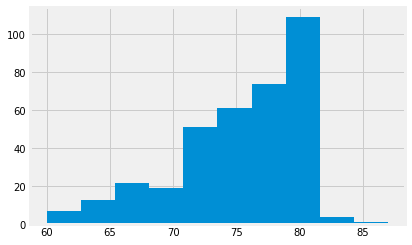

In [122]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

largest = pd.read_sql("SELECT date, prcp,station, tobs from measurement where date>= '2016-08-23' and station = 'USC00519397'", engine)
largest['tobs'].hist()


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
